TP1 Inf6804

Imports

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

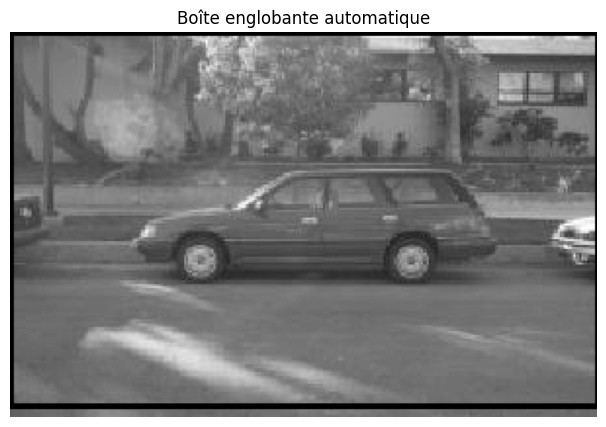

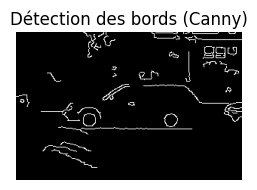

In [53]:
image_query_name = "car_query.jpg"
image = cv2.imread(image_query_name, cv2.IMREAD_GRAYSCALE)


# Display the image
# Appliquer un filtre pour réduire le bruit
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Détection des bords avec des seuils plus élevés
edges = cv2.Canny(blurred_image, threshold1=80, threshold2=180)

# Appliquer une dilatation pour connecter les contours proches
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
edges_dilated = cv2.dilate(edges, kernel, iterations=2)

# Trouver les contours
contours, _ = cv2.findContours(edges_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrer les contours pour ignorer les petits objets
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 80 and h > 80:  # Ajustez ces seuils selon votre image
        filtered_contours.append(contour)

# Trouver une seule boîte englobante autour des contours filtrés
if filtered_contours:
    all_points = np.vstack(filtered_contours)
    x, y, w, h = cv2.boundingRect(all_points)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)  # Dessiner la boîte englobante

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.imshow(image, cmap="gray")
plt.title("Boîte englobante automatique")
plt.axis("off")
plt.show()

# Image des bords détectés
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Détection des bords (Canny)")
plt.axis("off")

plt.show()
# Set HOG descriptor parameters
win_size = (64, 64)      # Size of the window (image patch)
block_size = (16, 16)    # Size of each block
block_stride = (8, 8)    # Step size to move the block
cell_size = (8, 8)       # Size of each cell within a block
nbins = 9                # Number of histogram bins

# Create the HOG descriptor object
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

# Resize the image to match the HOG descriptor window size
image_resized = cv2.resize(image, win_size)

# Compute the HOG descriptor for the entire image
hog_features = hog.compute(image_resized)


# Compute the number of blocks
n_blocks_x = (win_size[0] - block_size[0]) // block_stride[0] + 1
n_blocks_y = (win_size[1] - block_size[1]) // block_stride[1] + 1
n_blocks = n_blocks_x * n_blocks_y

# Reshape the HOG features into blocks
hog_features_per_block = np.reshape(hog_features, (n_blocks, -1))



HOG features for block 10: [0.25135827 0.05426405 0.02896572 0.04904979 0.07907538 0.08693691
 0.27523094 0.29750645 0.29750645 0.11343789 0.01250209 0.01101316
 0.05610755 0.07902277 0.05992802 0.29750645 0.29750645 0.29750645
 0.1841195  0.10717107 0.07144235 0.08010074 0.09492847 0.13327843
 0.12365992 0.14564407 0.14662908 0.07622037 0.06049783 0.04205202
 0.02542928 0.06232814 0.1294768  0.29750645 0.29750645 0.13481613]


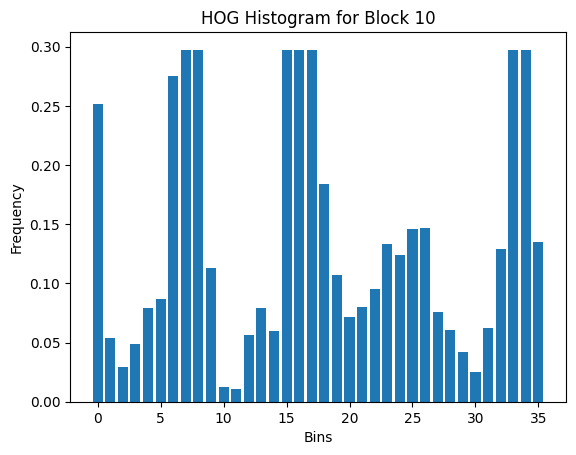

In [14]:
# Plot the histogram for the first block as an example
block_index = 10  # Choose the block to visualize
print(f'HOG features for block {block_index}: {hog_features_per_block[block_index]}')
plt.bar(range(hog_features_per_block.shape[1]), hog_features_per_block[block_index])
plt.title(f'HOG Histogram for Block {block_index}')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [15]:
def compute_dist(image_name1,image_name2):
    # Set HOG descriptor parameters
    win_size = (64, 64)      # Size of the window (image patch)
    block_size = (16, 16)    # Size of each block
    block_stride = (8, 8)    # Step size to move the block
    cell_size = (8, 8)       # Size of each cell within a block
    nbins = 9                # Number of histogram bins

    # Create the HOG descriptor object
    
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    image1 = cv2.imread(image_name1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_name2, cv2.IMREAD_GRAYSCALE)
    # Resize the image to match the HOG descriptor window size
    image_resized1 = cv2.resize(image1, win_size)
    image_resized2 = cv2.resize(image2, win_size)

    # Compute the HOG descriptor for the images
    hog_features1 = hog.compute(image_resized1)
    hog_features2 = hog.compute(image_resized2)

    #Compute the distance between the two HOG descriptors
    dist = np.linalg.norm(hog_features1-hog_features2)
    return dist

def compute_dist_all(image_query_name):
    list_dist = []
    for file_name in os.listdir("database"):
        if file_name.endswith(".jpg"):
            
            dist = compute_dist(image_query_name,"database/"+file_name)
            list_dist.append((file_name,dist))
    return list_dist

In [16]:
list_dist = compute_dist_all(image_query_name)
short_list = sorted(list_dist, key=lambda x: x[1])[:5]
print(short_list)

[('cat_4.jpg', 4.676578), ('ball_4.jpg', 4.9267254), ('pickles_5.jpg', 5.02483), ('cat_2.jpg', 5.1002436), ('pickles_1.jpg', 5.10212)]
